<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Project // pH Recognition based on RGB Color</font></h1>

Title: pH Recognition based on RGB Color\
Last Updated: April 10, 2021\
Author: Shafa Salsabila Kurniawan

## 1. Introduction

### 1.1 State of The Art

pH scale is a common measurement unit unit used to classify acid and base. In daily life, each compounds we met can be chemically labelled either as acid, bases, or salt. Acids and bases are classified as follows since they had what it calls "acidity level". That being said, it can be concluded that all compounds has pH value. As cool as it sounds, it's crucial since pH may control biological functions and many more things beyond.

Common methods to measure pH level are:
1. Using litmus paper
2. Using natural indicator
3. Using universal indicator
4. Using pH meter

Each methods has its own advantages and disadvantages, but generally most of those methods are based on the change of color. For example, measurement using litmus paper couldn't determine pH specifically in numbers (the outcome are automotically labelled as acid, base, or salt) yet it's the easiest way to do and doesn't cost much. Measurement using pH meter is the most accurate and specific one to determine pH level, but on the other hand it costs more (to be precise, it'd the most if compared to the other 3 methds). Meanwhile, measurement using universal indicator is more specific compared to litmus paper (though it's not more specific than pH meter) yet more affordable than pH meter. Commonly, pH measurement in school/university's laboratories use either universal indicator or pH meter (to be exact, pH meter is often used for research, while universal indicator is widely used for commn purpose including student's learning). 

Though pH measurement is a common method used by those who study or work in the field of chemistry or related field, it shouldn't be exclusive, since there's a general requirement that should be fulfilled to study/work in chemistry field that one should be free from any type of color blindness. However, as technology evolves, especially in the scope of machine learning and artificial intelligence, there's many things that could be done by machine to ease human duties. E.g detecting objects, texts, and colors. With the advancement of machine learning tehnologies that could detect colors more accurately, measuring pH level digitally could be enabled.

### 1.2 pH Recognition Dataset Introduction

The objective of this projects is to predict the pH scale (0-14) by recognizing the RGB decimal code given. The dataset used for this project is *pH Recognition* dataset uploaded by *Robert* (username: robjan) in **kaggle.com** *(can be seen online in https://www.kaggle.com/robjan/ph-recognition)*. For an overview, this dataset is made up of 1 CSV file and contains 653 rows & 4 columns, recognizing pH scale for various combinations of red, green, and blue that may appear in the pH indicator. As it seems, the data only covers pH level (ranging from 0 to 14) from random combinations of RGB colors (stated in decimal code, ranging from 0 to 255)

This dataset contains:

* `blue`: this represents the composition of blue in the given color written in RGB decimal code (0-255)
* `green`: this represents the composition of blue in the given color written in RGB decimal code (0-255)
* `red`: this represents the composition of blue in the given color written in RGB decimal code (0-255)
* `label`: this represents the corresponding pH scale based on the RGB code obtained

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

## 3. Loading Dataset & Exploratory Data Analysis

### 3.1 Loading Dataset

In [2]:
# Loading Dataset
ph = pd.read_csv("ph-data.csv")

# if the dataset is properly loaded, print this
print ('pH Recognition dataset read into a pandas dataframe!')

pH Recognition dataset read into a pandas dataframe!


### 3.2 Examining Dataset

The first step to do when analyzing a dataset is viewing the top 5 and bottom 5 rows of the dataset using `head()` and `tail()` function.

In [3]:
# Viewing the top 5 rows of the dataset using the head() function.
ph.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [4]:
# Viewing the bottom 5 rows of the dataset using the tail() function.
ph.tail()

,blue,green,red,label
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13
652,131,2,77,14


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method. Besides, we can use the `.shape` parameter to view the dimensions of the dataframe.

In [5]:
print ("The shape of the  data is (row, column):"+ str(ph.shape))
print (ph.info())

The shape of the  data is (row, column):(653, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB
None


To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [6]:
ph.columns.values

array(['blue', 'green', 'red', 'label'], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [7]:
ph.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Next, we can look up if the data has any missing value.

In [8]:
ph.isnull().sum()

blue     0
green    0
red      0
label    0
dtype: int64

Since the data doesn't have any missing value, data cleaning isn't required.

In [9]:
# Read the overall data
ph_data = ph

ph_data

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


**Inference**
- We have label data which is known as pH scale (range from 0 to 14)
- We have blue, green, and red data which is a unique RGB decimal code that represents its color hue in respective color
- As of this stage, no missing values is found
- Label is decided to be the target variable

In [10]:
# Labelling & separating target
y = ph['label'] # putting the target into a separate variable
x = ph.drop('label', axis = 1) # separating the target variable from the existing ones

In [11]:
# Checking the target variable using head() function
y.head()

0    0
1    1
2    2
3    3
4    4
Name: label, dtype: int64

In [12]:
# Check whether the target variable has been dropped or not
x.head()

,blue,green,red
0,36,27,231
1,36,84,250
2,37,164,255
3,22,205,255
4,38,223,221


In [13]:
# Viewing columns in the data
ph.columns

Index(['blue', 'green', 'red', 'label'], dtype='object')

### 3.3 Exploratory Data Analysis

Now, let's get a simple descriptive statistics with `.describe()` function for the data.

In [14]:
# Viewing simple descriptive statistics from the data
ph.describe()

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


We'll try to take some insights from the given statistics.

**Inference**
- Blue, green, and red has a minimum value of 0 and maximum value of 255
- Label has a minimum value of 0 and maximum value of 14
- The value of blue, green, and red distributed in the data differs. From the quartile and mean section, it seems that green has a relatively higher value distributed in the data compared to red, while red has a relatively higher value distributed in the data compared to blue.
- From the standard deviation, it can be known that green has the most spread out data compared to the other, but it's suspected that the three of them has outliers.

In [15]:
ph['blue'].value_counts()

0      81
1      34
73     16
182    14
36     13
       ..
106     1
254     1
109     1
111     1
255     1
Name: blue, Length: 165, dtype: int64

In [16]:
ph['green'].value_counts()

0      30
170    19
197    15
184    15
103    14
       ..
108     1
110     1
111     1
116     1
224     1
Name: green, Length: 186, dtype: int64

In [17]:
ph['red'].value_counts()

0      53
255    29
70     21
1      17
90     16
       ..
80      1
81      1
83      1
153     1
119     1
Name: red, Length: 172, dtype: int64

In [18]:
ph['label'].value_counts()

14    44
12    44
11    44
10    44
9     44
8     44
7     44
6     44
5     44
4     44
3     44
2     44
1     44
13    43
0     38
Name: label, dtype: int64

pH distribution seems to be fair, but the distribution of the other 3 categories (red, green, blue) seems to differ one another (but still, the three of 'em had 0 value as their modus)

#### Data Visualization using Matplotlib

Let's visualize using distplot to see how's the distribution for each variable.

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

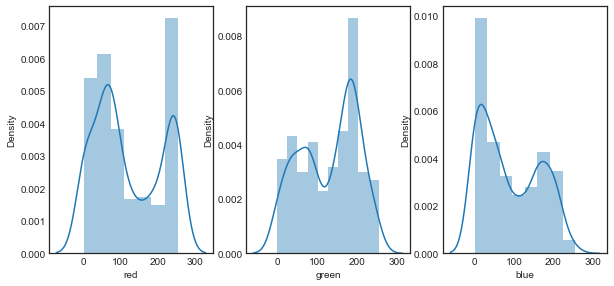

In [19]:
# Visualize using distplot to see the distribution of each variable
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(ph['red'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(ph['green'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(ph['blue'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Insights:**
- The distribution of blue is densely populated between 0 and 100
- The distribution of green is densely populated between 170 and 220
- The distribution of red is densley populated between 0 and 100 (though the modus is above 200)

Next, let's see how's the distribution of each variable in accordance to it pH level to see if there'c s correlation.

In [21]:
#Create the target variable and the features to train
y = ph.label

X = ph[['blue', 'green', 'red']]

Text(0, 0.5, 'ph value')

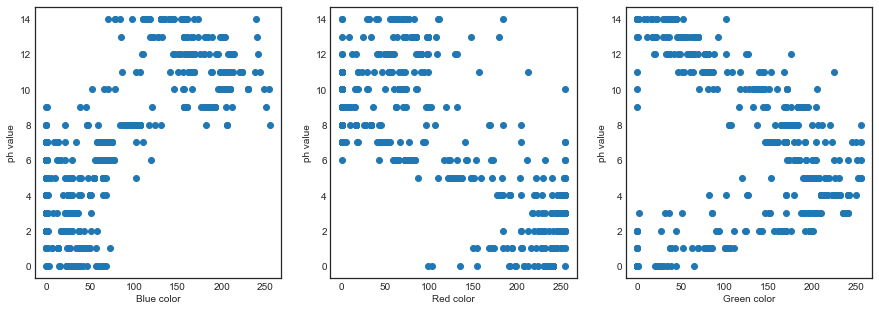

In [22]:
# Visualisation of data with respect to pH values
plt.figure(figsize=(15,5))

# plotting blue spectrum with ph
plt.subplot(1,3,1)
plt.scatter(X.blue,y)
plt.xlabel('Blue color')
plt.ylabel('ph value')

#plotting red spectrum with ph
plt.subplot(1,3,2)
plt.scatter(X.red,y)
plt.xlabel('Red color')
plt.ylabel('ph value')

#plotting green spectrum with ph
plt.subplot(1,3,3)
plt.scatter(X.green,y)
plt.xlabel('Green color')
plt.ylabel('ph value')

In [23]:
ph_index = ph.dtypes[ph.dtypes == 'int64'].index
ph_index

Index(['blue', 'green', 'red', 'label'], dtype='object')

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='blue'>

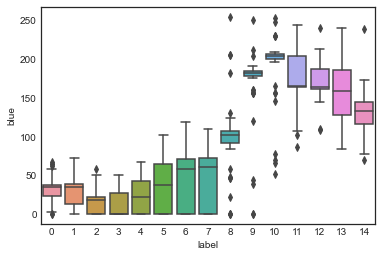

In [24]:
# Box Plot of Blue
sns.boxplot('label','blue',data=ph)

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='green'>

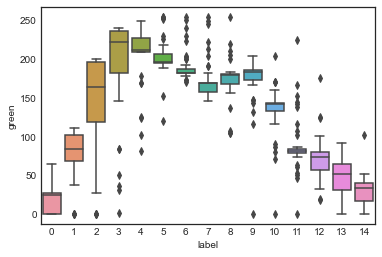

In [25]:
# Box Plot Green
sns.boxplot('label','green',data=ph)

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='red'>

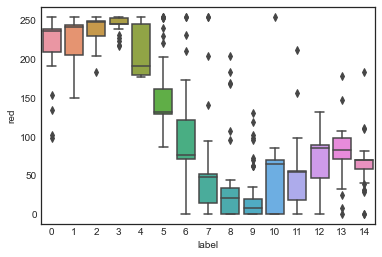

In [26]:
# Box Plot Red
sns.boxplot('label','red',data=ph)

**Insight**

- The label value do depend on the composition of red, green, and blue
- If the blue composition is relatively high, the label will stand around >8 (base)
- If the green composition is relatively high, the label will stand around 3-8
- If the red composition is relatively high, the label will stand most likely will stand below <6

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

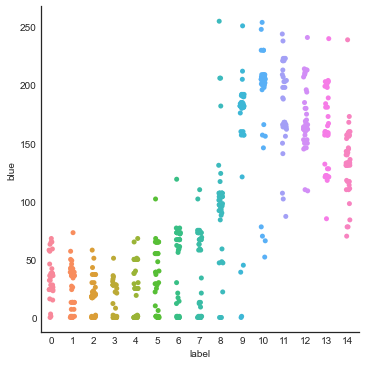

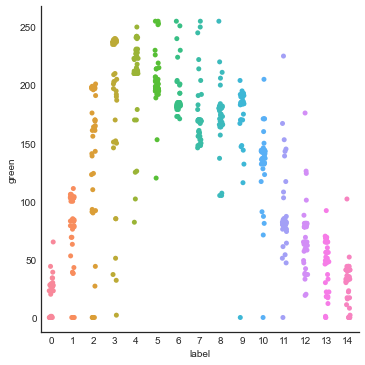

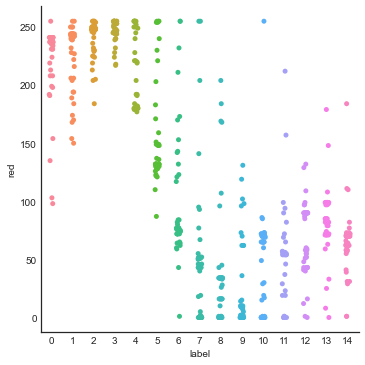

In [27]:
# Cat Plot
sns.catplot('label','blue',data=ph)
sns.catplot('label','green',data=ph)
sns.catplot('label','red',data=ph)

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='blue'>

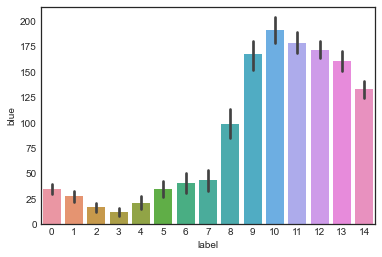

In [28]:
# Bar Plot
sns.barplot('label','blue',data=ph)

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='green'>

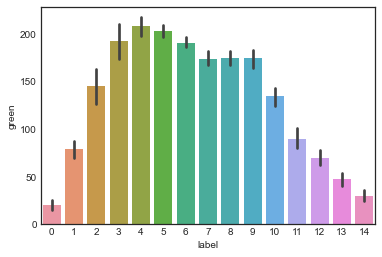

In [29]:
sns.barplot('label','green',data=ph)

C:\Users\Shafa Salsabila K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='red'>

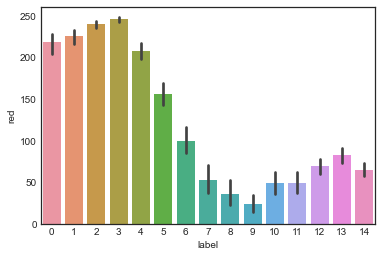

In [30]:
sns.barplot('label','red',data=ph)

Using bar plot, the distribution of the data can be seen clearly. It shows that the composition affects PH level

## 4. Data Preprocessing

Since the data is all numerical, no encoding is needed. Let's go on to scale the data.

In [31]:
# Importing libraries here
from sklearn import preprocessing
v = ph.values

# Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ph = pd.DataFrame(x_scaled)
ph

,0,1,2
0,0.141176,0.105882,0.905882
1,0.141176,0.329412,0.980392
2,0.145098,0.643137,1.000000
3,0.086275,0.803922,1.000000
4,0.149020,0.874510,0.866667
...,...,...,...
648,0.788235,0.482353,0.000000
649,0.796078,0.200000,0.180392
650,0.662745,0.243137,0.188235
651,0.678431,0.145098,0.309804


In [32]:
# Importing train_test_split to split the data into training & testing samples
from sklearn.model_selection import train_test_split

# Making the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3)

# Using sklearn library, the data has been splitted into train, test, and 70-30 ratio
# 70% for training, 30% for testing

In [33]:
# Let' check the dimension of the training data nad test data, just to ensure the data has been splitted
print(x_train.shape)
print(x_test.shape)

(457, 3)
(196, 3)


## 5. Defining Model

In [34]:
# Importing libraries here
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import math

### 5.1 Logistic Regression

In [36]:
# Import Logistic Regression module here
from sklearn.linear_model import LogisticRegression

# Create model using liblinear solver
LR = LogisticRegression(solver='liblinear')

# Set training data
LR.fit(x_train, y_train)

# Do a test to predict
predict_LR = LR.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_LR = accuracy_score(y_test, predict_LR)
mse_LR = mean_squared_error(y_test, predict_LR)
rmse_LR = math.sqrt(mse_LR)
print("Model's accuracy: ", accuracy_LR, '\n')
print("Mean Squared Error: ", mse_LR, '\n')
print("Root Mean Squared Error: ", rmse_LR,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_LR),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_LR))

Model's accuracy:  0.45918367346938777 

Mean Squared Error:  1.8673469387755102 

Root Mean Squared Error:  1.3665090335506422 

Confusion Matrix: 
 [[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  1  8  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  7  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  8  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  7  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  3  0  7  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  1  5  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  2  1  4  8  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  9  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  3  8  3  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  7  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  6]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      1.00      0.81    

**Inference:**
- The accuracy score is 57,14%

### 5.2 K-Nearest Neighbor

In [37]:
# Import K-Nearest Neighbors module here
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
KNN = KNeighborsClassifier()

# Set training data
KNN.fit(x_train, y_train)

# Do a test to predict
predict_KNN = KNN.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_KNN = accuracy_score(y_test, predict_KNN)
mse_KNN = mean_squared_error(y_test, predict_KNN)
rmse_KNN = math.sqrt(mse_KNN)
print("Model's accuracy: ", accuracy_KNN, '\n')
print("Mean Squared Error: ", mse_KNN, '\n')
print("Root Mean Squared Error: ", rmse_KNN,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_KNN),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_KNN))

Model's accuracy:  0.6989795918367347 

Mean Squared Error:  1.4591836734693877 

Root Mean Squared Error:  1.2079667518062687 

Confusion Matrix: 
 [[ 9  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  6  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  3  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  2  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  4  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0 10  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  2  1 11  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  8  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 10  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  3 12]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78     

**Inference:**
- The accuracy score is 75,00%

### 5.3 Support Vector Machine

In [38]:
# Import Support Vector Machine module here
from sklearn import svm

# Create model
model_SVM = svm.SVC()

# Set training data
model_SVM.fit(x_train, y_train)

# Do a test to predict
predict_SVM = model_SVM.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_SVM = accuracy_score(y_test, predict_SVM)
mse_SVM = mean_squared_error(y_test, predict_SVM)
rmse_SVM = math.sqrt(mse_SVM)
print("Model's accuracy: ", accuracy_SVM, '\n')
print("Mean Squared Error: ", mse_SVM, '\n')
print("Root Mean Squared Error: ", rmse_SVM,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_SVM),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_SVM))

Model's accuracy:  0.6887755102040817 

Mean Squared Error:  1.5357142857142858 

Root Mean Squared Error:  1.2392393980641052 

Confusion Matrix: 
 [[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  5  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  5  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  2  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  3  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 10  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  2  0 12  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  9  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  2  9  2  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  5  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 14]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      1.00      0.81     

**Inference:**
- The accuracy score is 67,85%

### 5.4 Decision Tree Classifier (CART)

In [39]:
# Import Decision Tree module here
from sklearn.tree import DecisionTreeClassifier

# Create model
DT = DecisionTreeClassifier()

# Set training data
DT.fit(x_train, y_train)

# Do a test to predict
predict_DT = DT.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_DT = accuracy_score(y_test, predict_DT)
mse_DT = mean_squared_error(y_test, predict_DT)
rmse_DT = math.sqrt(mse_DT)
print("Model's accuracy: ", accuracy_DT, '\n')
print("Mean Squared Error: ", mse_DT, '\n')
print("Root Mean Squared Error: ", rmse_DT,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_DT),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_DT))

Model's accuracy:  0.6938775510204082 

Mean Squared Error:  1.0204081632653061 

Root Mean Squared Error:  1.0101525445522108 

Confusion Matrix: 
 [[ 5  2  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 10  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  3  1  0  2  0  0  0  0  0]
 [ 0  0  0  2  0  2  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  0  8  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0 10  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  1  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  2  1 11  2  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  8  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 12  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  2 13]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.45      0.59     

**Inference:**
- The accuracy score is 71,42%

### 5.5 Random Forest

In [40]:
# Import Random Forest module here
from sklearn.ensemble import RandomForestClassifier

# Create model
RF = RandomForestClassifier()

# Set training data
RF.fit(x_train, y_train)

# Do a test to predict
predict_RF = RF.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_RF = accuracy_score(y_test, predict_RF)
mse_RF = mean_squared_error(y_test, predict_RF)
rmse_RF = math.sqrt(mse_RF)
print("Model's accuracy: ", accuracy_RF, '\n')
print("Mean Squared Error: ", mse_RF, '\n')
print("Root Mean Squared Error: ", rmse_RF,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_RF),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_RF))

Model's accuracy:  0.7602040816326531 

Mean Squared Error:  1.4744897959183674 

Root Mean Squared Error:  1.2142857142857142 

Confusion Matrix: 
 [[ 8  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  8  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  2  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  1  9  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0 10  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  1  1 11  1  1  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  9  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0 11  3  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1 14]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76     

**Inference:**
- The accuracy score is 78,06%

### 5.6 Naive Bayes

In [41]:
# Import Naive Bayes module here
from sklearn.naive_bayes import GaussianNB

# Create model
NB = GaussianNB()

# Set training data
NB.fit(x_train, y_train)

# Do a test to predict
predict_NB = NB.predict(x_test)

# Print the model's accuracy and confussion matrix
accuracy_NB = accuracy_score(y_test, predict_NB)
mse_NB = mean_squared_error(y_test, predict_NB)
rmse_NB = math.sqrt(mse_NB)
print("Model's accuracy: ", accuracy_NB, '\n')
print("Mean Squared Error: ", mse_NB, '\n')
print("Root Mean Squared Error: ", rmse_NB,
     '\n')
print("Confusion Matrix:", '\n',
      confusion_matrix(y_test, predict_NB),
      '\n')
print("Classification Report:", '\n',
      classification_report(y_test, predict_NB))

Model's accuracy:  0.5816326530612245 

Mean Squared Error:  0.9540816326530612 

Root Mean Squared Error:  0.9767710236555245 

Confusion Matrix: 
 [[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  7  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  2  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  9  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  8  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  1 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  2  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  1 11  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  3  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  3  7  3  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  6  4  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 14]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     

**Inference:**
- The accuracy score is 63,77%

## Summary

In [42]:
print('Accuracy of Logistic Regression: ', accuracy_LR)
print('Accuracy of K-Nearest Neighbors: ', accuracy_KNN)
print('Accuracy of Support Vector Machine: ', accuracy_SVM)
print('Accuracy of Decision Tree: ', accuracy_DT)
print('Accuracy of Random Forest: ', accuracy_RF)
print('Accuracy of Naive Bayes: ', accuracy_NB)

Accuracy of Logistic Regression:  0.45918367346938777
Accuracy of K-Nearest Neighbors:  0.6989795918367347
Accuracy of Support Vector Machine:  0.6887755102040817
Accuracy of Decision Tree:  0.6938775510204082
Accuracy of Random Forest:  0.7602040816326531
Accuracy of Naive Bayes:  0.5816326530612245


## 6. Evaluating Model

After trying various classification methods, my final decision (to predict the pH level from the given RGB color) would go to `Random Forest` since it has the highest accuracy of all.